In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier

In [35]:
data=load_breast_cancer()
X=data.data
y=data.target

In [36]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
X_std=scale.fit_transform(X)

In [39]:
X_train,y_train,X_test,y_test=train_test_split(X_std,y,test_size=0.2,random_state=42)

In [45]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)

grid_search_rf = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [46]:
print("Best Parameters:",grid_search_rf.best_params_)

Best Parameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [47]:
best_rf=grid_search_rf.best_estimator_
y_pred=best_rf.predict(X_test)
print("Accuracy Score: ",accuracy_score(y_test,y_pred))
print("ROC AUC (Random Forest):", roc_auc_score(y_test, best_rf.predict_proba(X_test)[:, 1]))
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix (Random Forest):\n", conf_matrix)

Accuracy Score:  0.9649122807017544
ROC AUC (Random Forest): 0.9977071732721913
Confusion Matrix (Random Forest):
 [[40  3]
 [ 1 70]]


In [48]:
importances=best_rf.feature_importances_
indices=np.argsort(importances)[::-1]
features=data.feature_names

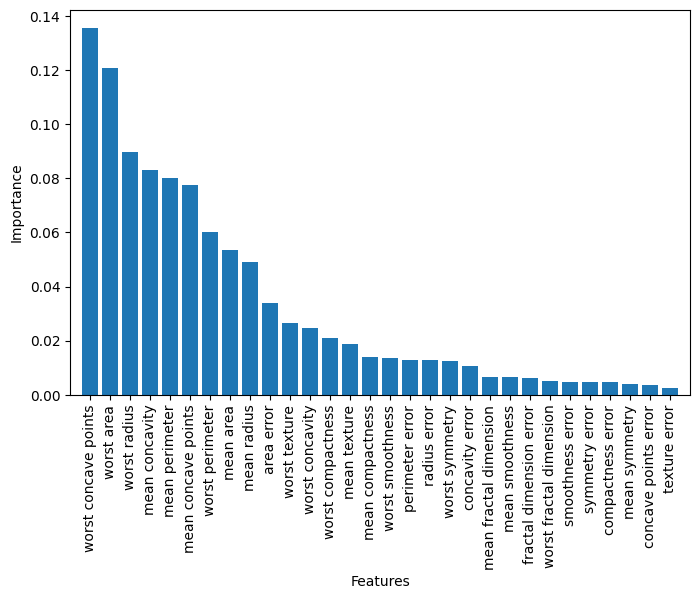

In [51]:
plt.figure(figsize=(8,5))
plt.bar(range(X.shape[1]),importances[indices],align='center')
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

In [ ]:
# # Plot ROC Curve
# fpr, tpr, _ = roc_curve(y_test, best_ada.predict_proba(X_test)[:, 1])
# plt.figure()
# plt.plot(fpr, tpr, color='blue', lw=2, label='AdaBoost (area = %0.2f)' % roc_auc_score(y_test, best_ada.predict_proba(X_test)[:, 1]))
# plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve')
# plt.legend(loc="lower right")
# plt.show()